# Credit Card Fraud Detection

## Import Packages

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
plt.style.use('bmh')

## Load the Data

In [184]:
data = pd.read_csv('creditcard.csv')
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Check for Missing Values

In [185]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Identify Fraudulent and Legitimate Transactions

In [186]:
#1 is fraud, 0 is legit
fraud = data.loc[data['Class'] == 1]
legit = data.loc[data['Class'] == 0]

In [187]:
#Number of fraudulent transactions
fraud.shape[0]

492

In [188]:
#Number of legitimate transactions
legit.shape[0]

284315

In [189]:
#Fraud rate
fraud.shape[0]/data.shape[0]

0.001727485630620034

Only .173% of the data is fraudulent, which means that the data is seriously imbalenced.

## Train - Test Split

In [190]:
#Establishing features and targets
X = data.iloc[:,0:-1]
X = X.to_numpy()

y = data['Class']

In [191]:
#Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= data['Class'])

## Dummy Classifier (Baseline)

In [192]:
dc = DummyClassifier()
dc.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier()

In [193]:
y_pred_dummy = dc.predict(X_test)

In [194]:
pd.crosstab(y_test, y_pred_dummy)

col_0,0,1
Class,,
0,70944,135
1,123,0


In [195]:
print(classification_report(y_test,y_pred_dummy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.00      0.00      0.00       123

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202



## Logistic Regression Model

In [196]:
#Fitting the regression
lr = LogisticRegression(max_iter = 360)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=360)

In [197]:
#Storing the predicted values from the model in y_pred
y_pred = lr.predict(X_test)

In [198]:
#Shows how accurate the model was.
accuracy_score(y_test, y_pred)

0.9991432824920649

In [199]:
#Area under ROC curve
roc_auc_score(y_test, y_pred)

0.7966705887883595

In [200]:
#Confusion Matrix
pd.crosstab(y_test, y_pred)

col_0,0,1
Class,,
0,71068,11
1,50,73


In [201]:
#Prints precision, recall, f1-scores
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.87      0.59      0.71       123

    accuracy                           1.00     71202
   macro avg       0.93      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202



The results of these tests are all quite different, which is in part to imbalanced nature of the dataset. To get a more accurate result we can conduct oversampling or SMOTE (Synthetic Minority Oversampling Technique) to combat the imbalanced data.

## SMOTE 

In [202]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [203]:
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [204]:
from collections import Counter

In [205]:
print('Before SMOTE: ', Counter(y_train))
print('Before SMOTE: ', Counter(y_train_smote))

Before SMOTE:  Counter({0: 213236, 1: 369})
Before SMOTE:  Counter({0: 213236, 1: 213236})


Now we have an even distribution of fraud and legit transactions, we can proceed to model.

## Logistic Regression with SMOTE Training Data

In [206]:
#Fitting regression with new balanced data
lr_smote = LogisticRegression(max_iter = 200)
lr_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=200)

In [207]:
#Predicted outputs for test dataset
y_pred_smote = lr_smote.predict(X_test)

In [208]:
#Confusion Matrix
pd.crosstab(y_test, y_pred_smote)

col_0,0,1
Class,,
0,69784,1295
1,14,109


In [210]:
#Prints precision, recall, f1-scores
print(classification_report(y_test,y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.08      0.89      0.14       123

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.57     71202
weighted avg       1.00      0.98      0.99     71202



## Naive Bayes with SMOTE Training Data

In [211]:
#Fitting model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_smote, y_train_smote)

GaussianNB()

In [212]:
#Predicted outputs for test inputs
y_pred_nb = nb.predict(X_test)

#Confusion Matrix
pd.crosstab(y_test, y_pred_nb)

col_0,0,1
Class,,
0,70597,482
1,28,95


In [214]:
#Prints precision, recall, f1-scores
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.16      0.77      0.27       123

    accuracy                           0.99     71202
   macro avg       0.58      0.88      0.63     71202
weighted avg       1.00      0.99      1.00     71202



## Decision Trees with SMOTE Training Data

In [215]:
#Fitting model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 12)
dt.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=12)

In [216]:
#Storing predicted values from model into y_pred_dt
y_pred_dt = dt.predict(X_test)

pd.crosstab(y_test, y_pred_dt)

col_0,0,1
Class,,
0,70954,125
1,30,93


In [217]:
#Prints precision, recall, f1-scores
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.43      0.76      0.55       123

    accuracy                           1.00     71202
   macro avg       0.71      0.88      0.77     71202
weighted avg       1.00      1.00      1.00     71202



## Plotting ROC Curves

In [218]:
#Estimated Probabilities

dc_probs = dc.predict_proba(X_test)[:,1]
lr_probs = lr_smote.predict_proba(X_test)[:,1]
nb_probs = nb.predict_proba(X_test)[:,1]
dt_probs = dt.predict_proba(X_test)[:,1]

In [219]:
#AUROC for each method
dc_auc = roc_auc_score(y_test, dc_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

In [220]:
print('Dummy Classifier: AUROC = %.3f' % (dc_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('Decision Trees: AUROC = %.3f' % (dt_auc))

Dummy Classifier: AUROC = 0.499
Logistic Regression: AUROC = 0.967
Naive Bayes: AUROC = 0.966
Decision Trees: AUROC = 0.877


In [221]:
#Setting true/false positive rates
dc_fp, dc_tp,_ = roc_curve(y_test, dc_probs)
lr_fp, lr_tp,_ = roc_curve(y_test, lr_probs)
nb_fp, nb_tp,_ = roc_curve(y_test, nb_probs)
dt_fp, dt_tp,_ = roc_curve(y_test, dt_probs)

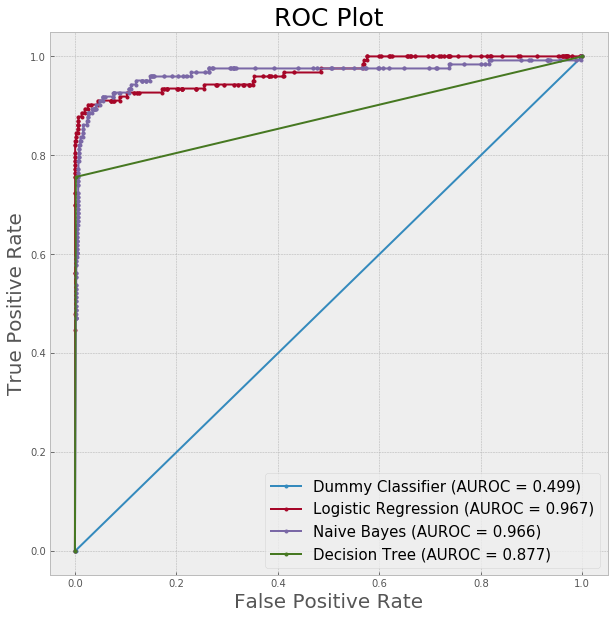

In [222]:
#Plotting Data
fig = plt.figure(figsize=(10,10))
plt.plot(dc_fp, dc_tp, marker='.', label='Dummy Classifier (AUROC = %0.3f)' % dc_auc)
plt.plot(lr_fp, lr_tp, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(nb_fp, nb_tp, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(dt_fp, dt_tp, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)

# Title
plt.title('ROC Plot', fontsize = 25)
# Axis labels
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
# Show legend
plt.legend(fontsize = 15)
# Show plot
plt.show()